# First steps in looking at sky maps from cora

In [10]:
# Load useful packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

import h5py
import healpy as hp

from draco.core import containers

## Exploring maps

In [2]:
# cora map files can be accessed in 2 ways: by reading using the h5py library,
# or loading the entire file into memory as a "container", which is a class
# defined in draco that contains data and metadata for various output files
# we use in simulations and data analysis.

# Let's do the latter, and load a map file as a container.

# First, import the containers module of draco, and also healpy:
from draco.core import containers
import healpy as hp

# Next, load the map (replace the filename with your own 21cm cora map):
in_map = containers.Map.from_file("maps/map_21cm.h5")

In [3]:
# Datasets are stored in a container in a format similar to a Python dict.
# Print descriptions of each dataset:
print(list(in_map.items()))

[('map', <memh5 common dataset '/map': shape (5, 4, 196608), type "dtype('float64')">)]


In [4]:
# The map dataset has 3 axes. What are they?
print(in_map['map'].attrs['axis'])

['freq' 'pol' 'pixel']


In [5]:
# Information about each axis is contained in its index_map entry:
print(list(in_map.index_map.keys()))

['freq', 'pixel', 'pol']


In [6]:
# For example, what's in the frequency axis? It has tuples, in the format 
# (central frequency, channel width) for each frequency channel in the map
print(in_map.index_map['freq'])

[(400., 20.) (420., 20.) (440., 20.) (460., 20.) (480., 20.)]


In [7]:
# The pol axis contains Stokes parameters:
print(in_map.index_map['pol'])

[b'I' b'Q' b'U' b'V']


In [8]:
# And the pixel index is just a list of pixel indices - not so useful on its own,
# but sometimes needed to interact with healpy
print(in_map.index_map['pixel'])

[     0      1      2 ... 196605 196606 196607]


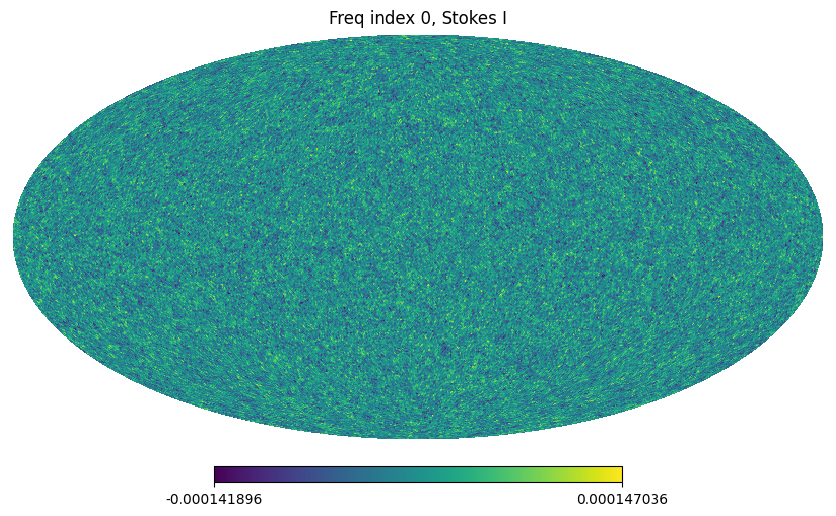

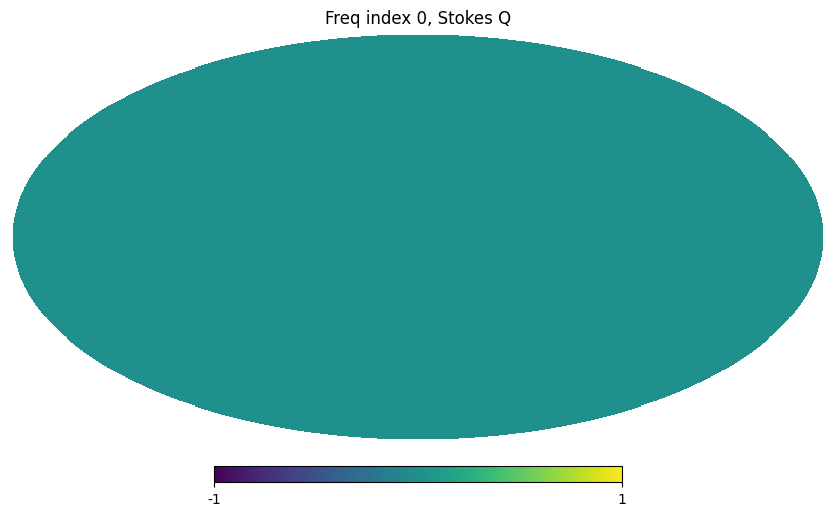

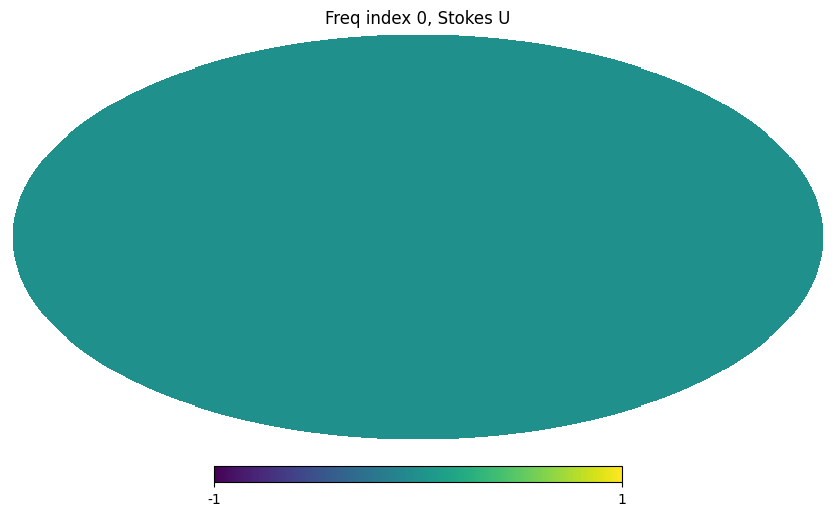

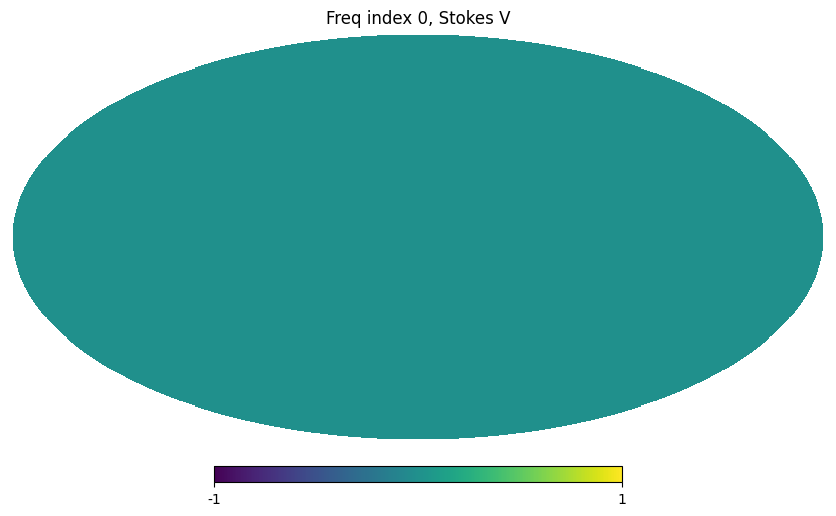

In [9]:
# We can use healpy to plot specific frequencies and pols:
for pi, p in enumerate(in_map.index_map['pol']):
    hp.mollview(in_map['map'][0, pi], title=f'Freq index 0, Stokes {p.decode()}')

## Exercises

1. Re-make the plots above, but with the actual frequency (in MHz) in the plot titles, instead of the frequency index.

2. Generate a foreground map with cora (`cora-makesky foreground ...`), and plot the maps for each Stokes parameter at a given frequency.

3. Plot the foreground map in the different coordinate systems available in healpy (e.g. galactic, equatorial).

4. Using a healpy routine, measure the auto power spectrum ($C_\ell$) of 21cm and foregrounds at a given frequency, and plot them as a function of $\ell$.

5. Using a healpy routine, measure the cross power spectrum between 2 frequencies in a 21cm map file. Do so for several pairs of frequencies, and plot curves for different frequency separations. How do the curves behave as a function of frequency separation? Is this what you expect, based on the general spectral properties of foregrounds and 21cm?